# Turing Academy 

## Aula 2: Bibliotecas

### Questões

Para começar, importe as bibliotecas necessárias (NumPy, Pandas, Matplotlib e Seaborn) com seus "apelidos":

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas: manipulação de dados em *DataFrames*

Nesse notebook, serão utilizados dois arquivos do tipo **csv**, são eles: `jogos_info.csv`, que contém o nome dos jogos e algumas de suas informações — como ano de lançamento e a *publisher* — e `jogos_vendas.csv`, que também contém o nome dos jogos e o número de vendas. Abra cada um dos arquivos em *dataframes* usando Pandas e junte os dois em um só *dataframe*, que será utilizado para as análises e os gráficos.

In [81]:
info = pd.read_csv('jogos_info.csv', index_col=0)
vendas = pd.read_csv('jogos_vendas.csv', index_col=0)
df = pd.concat([info, vendas], keys='inner', axis=1, ignore_index=True)
df.drop(5,axis=1,inplace=True)
df.columns = ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']

Mostre as características do *dataset*: 

* exiba suas 10 primeiras linhas;
* mostre as informações de cada coluna; 
* descreva as colunas que possuem dados numéricos.

In [82]:
df.head(n=10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


In [84]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063
std,5.828981,0.816683,0.505351,0.309291,0.188588
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


Remova as linhas que possuem dados faltantes

In [85]:
df.dropna()
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00


Agora, crie no *dataframe* uma coluna que forneça o número de vendas totais, chamada `'Global_Sales'`.

In [104]:
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

Crie um *dataframe* que contenha os jogos disponíveis para o NES. Mostre a média de vendas globais, o jogo mais popular da plataforma e o menos popular também.

In [105]:
nes_df = df[df["Platform"] == 'NES']

In [106]:
nes_df['Global_Sales'].mean()

2.56173469387755

In [108]:
nes_df[nes_df['Global_Sales'] == nes_df['Global_Sales'].max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [109]:
nes_df[nes_df['Global_Sales'] == nes_df['Global_Sales'].min()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12636,Adventures of Lolo,NES,1989.0,Puzzle,HAL Laboratory,0.06,0.0,0.0,0.0,0.06


No *dataframe* original, encontre:

* o jogo mais popular do primeiro ano presente nos dados;
* o jogo mais popular do último ano também presente nos dados.

Além disso, mostre todas as informações disponíveis no *dataframe* para cada um dos jogos acima.

In [122]:
ano_min = df['Year'].min()
ano_max = df['Year'].max()

In [123]:
df_min = df[df['Year'] == ano_min]
df_max = df[df['Year'] == ano_max]

In [124]:
df_min[df_min['Global_Sales'] == df_min['Global_Sales'].max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,Asteroids,2600,1980.0,Shooter,Atari,4.0,0.26,0.0,0.05,4.31


In [127]:
df_max[df_max['Global_Sales'] == df_max['Global_Sales'].min()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29


Procure seu jogo favorito. Se encontrá-lo, mostre sua linha do *dataframe*:


In [125]:
df[df['Name'].str.contains('Pokémon')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
30,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
88,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
130,Pokémon Emerald Version,GBA,2004.0,Role-Playing,Nintendo,2.57,1.58,2.06,0.21,6.42
132,Pokémon Crystal Version,GB,2000.0,Role-Playing,Nintendo,2.55,1.56,1.29,0.99,6.39
335,Pokémon Trading Card Game,GB,1998.0,Strategy,Nintendo,1.49,0.73,1.38,0.10,3.70
547,Pokémon Stadium 2,N64,2000.0,Strategy,Nintendo,1.02,0.36,1.13,0.23,2.74
604,Pokémon Colosseum,GC,2003.0,Role-Playing,Nintendo,1.21,0.57,0.70,0.07,2.55
824,Pokémon Mystery Dungeon: Blue Rescue Team,DS,2005.0,Role-Playing,Nintendo,1.16,0.06,0.83,0.00,2.05
1814,Pokémon Mystery Dungeon: Red Rescue Team (US w...,GBA,2005.0,Role-Playing,Nintendo,0.81,0.30,0.00,0.02,1.13
8077,Pokémon I Choose You / Squirtle Squad Game Boy...,GBA,2004.0,Misc,Nintendo,0.13,0.05,0.00,0.00,0.18


## Matplotlib e Seaborn: visualização e análise dos dados

Agora, com esse mesmo *dataframe*, vamos visualizar os seus dados e as correlações existentes entre eles — como suas variações ao longo do tempo ou entre países. 

### Gráficos de Linha

Inicialmente, vamos verificar como se comportaram as vendas globais ao longo das 4 décadas que o dataset cobre. Considerando o fator "tempo", é interessante visualizarmos um gráfico de linha.

Utilize Seaborn para plotar o gráfico de linha: Vendas globais X Tempo.

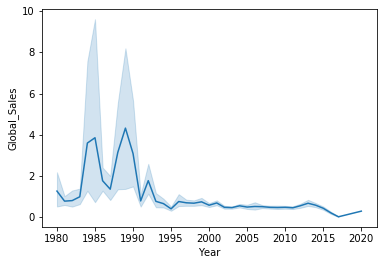

In [131]:
sns.lineplot('Year', 'Global_Sales', data=df)
plt.show()

### Plots categóricos

Agora, vamos verificar o número de vendas por região através de dois gráficos: um gráfico de barras e um gráfico de setores. Para isso, vamos utilizar o jogo **Super Mario Bros.** de 1985.

* Utilize Seaborn ou Matplotlib para plotar um gráfico de barras.
  * Nele, cada barra deve ser uma região contemplada no dataset (NA, EU, JP e outros) e sua altura fica determinada pela quantidade de vendas.
  
    
* Utilize Matplotlib para plotar um gráfico de setores (*pizza*).
  * Nele, cada repartição deve ser uma região contemplada no dataset (NA, EU, JP e outros) e sua área fica determinada pela quantidade relativa de vendas (percentual de vendas).

* Não esqueça de melhorar a apresentação do seu gráfico: adicione um título e uma legenda para o eixo y.

***
**Dicas:**
* Utilizar a Seaborn é um pouco mais intuitivo para o gráfico de barras.
* Certifique-se de criar uma legenda para os valores do eixo x — e.g. uma lista com o nome de cada uma das regiões.
* Para obter a altura de cada a barra, o método `DataFrame.iloc` é uma boa alternativa.
***

Text(0, 0.5, 'Número de vendas')

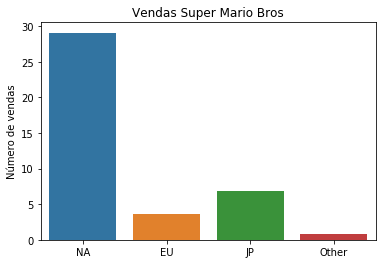

In [140]:
regioes = ['NA', 'EU', 'JP', 'Other']
sns.barplot(regioes, df.iloc[1, 5:9])

plt.title('Vendas Super Mario Bros')
plt.ylabel('Número de vendas')

Sua próxima tarefa: condensar informações. Como os dois gráficos anteriores acabam sendo complementares, exiba ambos em uma mesma figura, lado a lado.

Utilize Matplotlib para plotar o gráfico de barras e o gráfico de setores lado a lado, em uma mesma figura.

***
**Dicas:**
* Utilize `plt.subplot()` para criar vários gráficos em uma mesma figura;

* Se achar necessário, aumente o tamanho da figura;

* Nos subplots, costuma ser mais intuitivo utilizar apenas gráficos da Matplotlib, mas isso não é necessário;

* Quando utilizamos *subplots*, alguns comandos (como de título e legenda) passam a ser precedidos por `set_`.
  * Isto é: `plt.ylabel()` transforma-se em `ax.set_ylabel()`; sendo `ax` a variável que armazena um determinado *subplot*.
***

([<matplotlib.patches.Wedge at 0x47fadea408>,
 [Text(-0.7082351860460256, 0.8416667518955181, 'NA'),
  Text(0.11828309184563464, -1.0936220143099888, 'EU'),
  Text(0.8744282691697882, -0.6673643697986344, 'JP'),
  Text(1.0980129925724358, -0.06608682275707053, 'Other')])

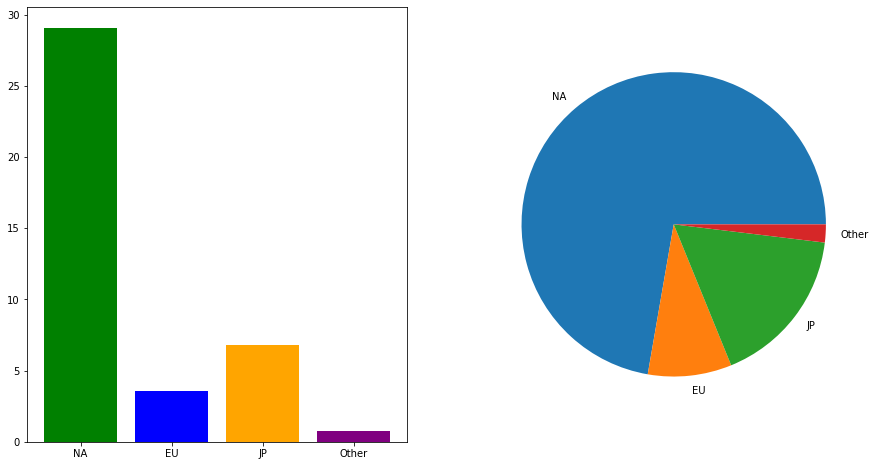

In [154]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.bar(regioes, df.iloc[1, 5:9], color = ['green', 'blue', 'orange', 'purple'])
ax2.pie(df.iloc[1, 5:9], labels=regioes)

### Plots Estatísticos

Utilizando Matplotlib, faça um histograma do número de vendas para `JP_Sales`:

(array([1.6364e+04, 1.5400e+02, 4.0000e+01, 2.0000e+01, 1.1000e+01,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.   ,  1.022,  2.044,  3.066,  4.088,  5.11 ,  6.132,  7.154,
         8.176,  9.198, 10.22 ]),
 <a list of 10 Patch objects>)

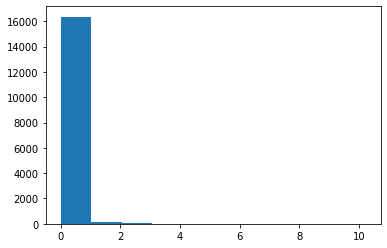

In [155]:
plt.hist(df['JP_Sales'])

Percebemos então uma grande concentração dos dados. Para ajudar a explicar esse fato, mostre a porcentagem de jogos que passaram de 1 milhão de vendas.

In [164]:
milhao = len(df[df['NA_Sales'] >= 1])/len(df["NA_Sales"])

print(round(milhao*100, 5), '%', sep='')

5.48259%


Então, para dar mais utilidade aos gráficos, devemos agora recortar nosso *dataset*. Reutilizando os conceitos de *slicing* do NumPy, crie, por meio dos operadores lógicos dessa biblioteca, um **novo *dataframe*** que satisfaça as seguintes condições:
  * `NA_Sales < 1`
  * `EU_Sales < 0.1`

***
**Dica:**
* O NumPy introduz funções que atuam como os operadores lógicos (`and`, `or` e outros), mas que são mais abrangentes.
***

In [170]:
df2 = df[(df['NA_Sales'] < 1) & (df["EU_Sales"] < 0.1)]

Finalmente, vamos voltar a olhar para a distribuição dos dados. Considerando esse novo dataset, exiba as curvas de distribuição de densidades para as vendas na América do Norte.

Utilize Seaborn para plotar a curva de distribuição de densidades (isto é, o "histograma suavizado") para as vendas.

In [171]:
df2.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,11765.000000,11965.000000,11965.000000,11965.000000,11965.000000,11965.000000
mean,2006.417765,0.083501,0.018351,0.056154,0.011828,0.169834
std,5.756962,0.132297,0.024378,0.183677,0.061474,0.240402
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.040000
50%,2007.000000,0.040000,0.010000,0.000000,0.000000,0.100000
75%,2010.000000,0.110000,0.030000,0.040000,0.010000,0.210000
max,2020.000000,0.990000,0.090000,4.870000,2.930000,4.870000


Com esse mesmo dataset, podemos verificar uma outra forma de visualizar dados: *boxplot*. Esse plot existe tanto na biblioteca Matplotlib quanto na Seaborn, ficando a sua escolha qual utilizar.

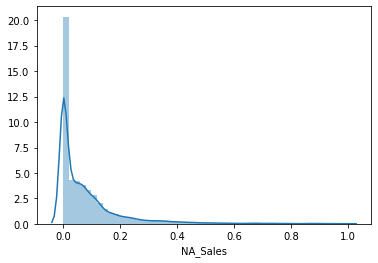

In [174]:
sns.distplot(df2['NA_Sales'])

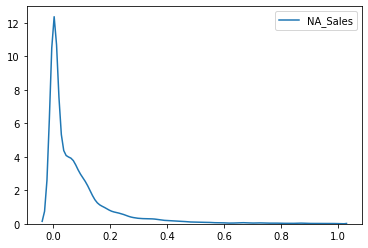

In [175]:
sns.kdeplot(df2['NA_Sales'])

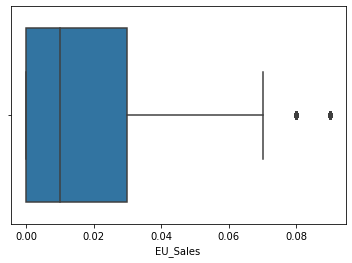

In [177]:
sns.boxplot(df2['EU_Sales'])

### Plots de Correlação

Seu objetivo agora é verificar se as vendas na América do Norte acompanham as vendas na Europa, ou se elas correlacionam-se melhor com as vendas no Japão. Para isso, utilizaremos *scatterplots*. 

* Utilize Seaborn para plotar o gráfico de dispersão de vendas na Europa por vendas na América do Norte.
  * Os marcadores devem se diferenciar pela coloração consoante o **ano de lançamento** do jogo.


* Utilize Seaborn para plotar o gráfico de dispersão de vendas no Japão por vendas na América do Norte.
  * Os marcadores devem se diferenciar pela coloração consoante o **gênero** do jogo.

***
**Observação:** para esses gráficos, utilize o *dataset* original.
***

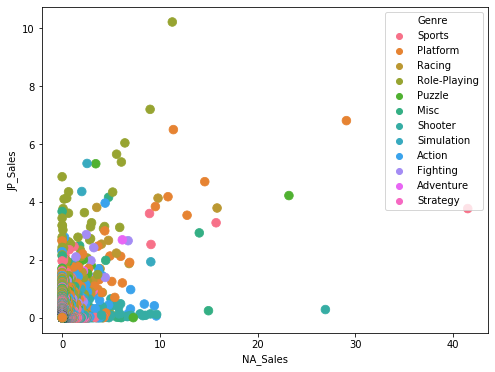

In [184]:
plt.figure(figsize=(8,6))

sns.scatterplot(df["NA_Sales"], df['JP_Sales'], hue=df['Genre'], s=75, edgecolor=None)

Ainda que os dados continuem substancialmente amontados (afinal, temos uma grande quantidade deles), já percebemos que existe uma correlação maior do número de vendas na América do Norte com o número de vendas na Europa. Para verificar isso de fato: através de uma mapa de calor exiba a matriz de correlação do dataset.

* Utilize a biblioteca Pandas para criar a matriz de correlação do dataset.

* Através da Seaborn plote o *heatmap* da matriz de correlação.

***
**Dicas:**
* Lembre-se de que em uma matriz de correlação os valores oscilam entre -1 e 1;
* Utilize o parâmetro `annot=True` para garantir que os valores estejam no interior das células.
***

In [185]:
corr = df.corr()

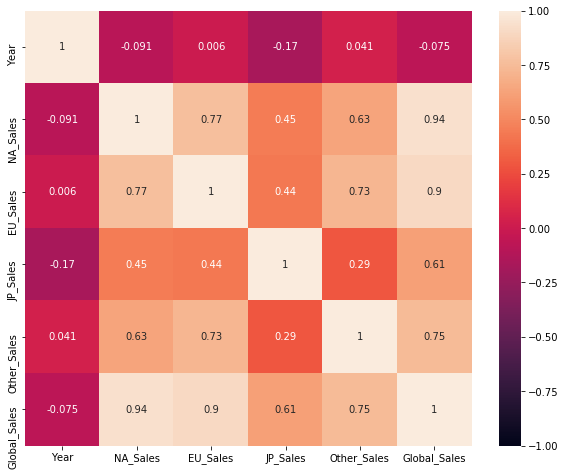

In [187]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

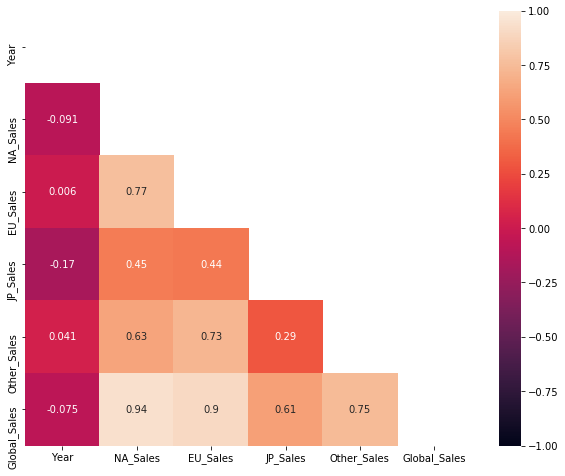

In [189]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=np.triu(corr))